# Classification models applied to the market. 

### Authors: 
- Fernando Gallego
- Benjamin Vega
- Iuliana Ilie

In [1]:
import requests 
import click
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date
from datetime import timedelta
import sys
from scipy import stats

We will make use of the functions developed in the **FinancialModeling.py** file, so we import the path to the file.

In [3]:
functions_dir = "../finansp/"
sys.path.insert(1, functions_dir )

import FinancialModeling as FM

The first function used is **getCompany**. This function obtains the values date, high, low, close, adjClose, volume unadjustedVolume, change, changePercent, vwap, label, changeOverTime on a daily basis for the last five years from the company indicated by the ticker.

In [3]:
df = FM.getCompany("GOOG")

We use the panda functions to get the essential information of the dataset generated for the company.

In [4]:
df.tail(5)

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
1253,2015-12-03,766.01,768.995,745.63,752.54,752.54,2590600.0,2590600.0,-13.47,-1.758,755.72167,"December 03, 15",-0.01758
1254,2015-12-02,768.90,775.955,758.96,762.38,762.38,2230400.0,2230400.0,-6.52,-0.848,765.76500,"December 02, 15",-0.00848
1255,2015-12-01,747.11,768.950,746.70,767.04,767.04,2134600.0,2134600.0,19.93,2.668,760.89667,"December 01, 15",0.02668
1256,2015-11-30,748.81,754.930,741.27,742.60,742.60,2097600.0,2097600.0,-6.21,-0.829,746.26667,"November 30, 15",-0.00829
1257,2015-11-27,748.46,753.410,747.49,750.26,750.26,838500.0,838500.0,1.80,0.240,750.38667,"November 27, 15",0.00240


In [5]:
df.describe()

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,changeOverTime
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000
mean,1069.481192,1079.904443,1059.530873,1070.119670,1070.119670,1.684375e+06,1.684375e+06,0.638478,0.057839,1069.851662,0.000578
std,254.246204,258.373098,251.140322,254.830817,254.830817,7.729583e+05,7.729583e+05,14.771630,1.277938,254.700600,0.012779
min,667.850000,672.300000,663.060000,668.260000,668.260000,3.475000e+05,3.475000e+05,-71.490000,-5.764000,667.948000,-0.057640
25%,825.002500,828.625000,821.493750,824.685000,824.685000,1.212250e+06,1.212250e+06,-5.657500,-0.560750,825.936253,-0.005607
50%,1075.170000,1085.185000,1061.896950,1075.614950,1075.614950,1.479150e+06,1.479150e+06,0.620000,0.064500,1073.925000,0.000645
75%,1214.750000,1226.000000,1204.212500,1215.532575,1215.532575,1.929250e+06,1.929250e+06,8.012500,0.793000,1215.567500,0.007930
max,1790.900024,1818.060059,1767.689941,1781.380005,1781.380005,6.348100e+06,6.348100e+06,61.830000,5.201000,1782.713300,0.052010


The next function used is **visualize**. This function performs a series of representations in order to study the data set. The first one is based on histograms. With it you can study the distribution of each of the attributes. Next, boxplots are represented. Since the values that have the attributes are far apart, it is not easy to appreciate the existence of outliers in attributes other than the volume. Finally, a heat map of the correlation matrix is represented to get the relationship between several attributes that allows us to eliminate some of them. Even so, since the data set is made up of few attributes, none will be eliminated.

            date    open     high     low   close  adjClose     volume  \
1253  2015-12-03  766.01  768.995  745.63  752.54    752.54  2590600.0   
1254  2015-12-02  768.90  775.955  758.96  762.38    762.38  2230400.0   
1255  2015-12-01  747.11  768.950  746.70  767.04    767.04  2134600.0   
1256  2015-11-30  748.81  754.930  741.27  742.60    742.60  2097600.0   
1257  2015-11-27  748.46  753.410  747.49  750.26    750.26   838500.0   

      unadjustedVolume  change  changePercent       vwap            label  \
1253         2590600.0  -13.47         -1.758  755.72167  December 03, 15   
1254         2230400.0   -6.52         -0.848  765.76500  December 02, 15   
1255         2134600.0   19.93          2.668  760.89667  December 01, 15   
1256         2097600.0   -6.21         -0.829  746.26667  November 30, 15   
1257          838500.0    1.80          0.240  750.38667  November 27, 15   

      changeOverTime  
1253        -0.01758  
1254        -0.00848  
1255         0.02668  


../finansp\FinancialModeling.py:33: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


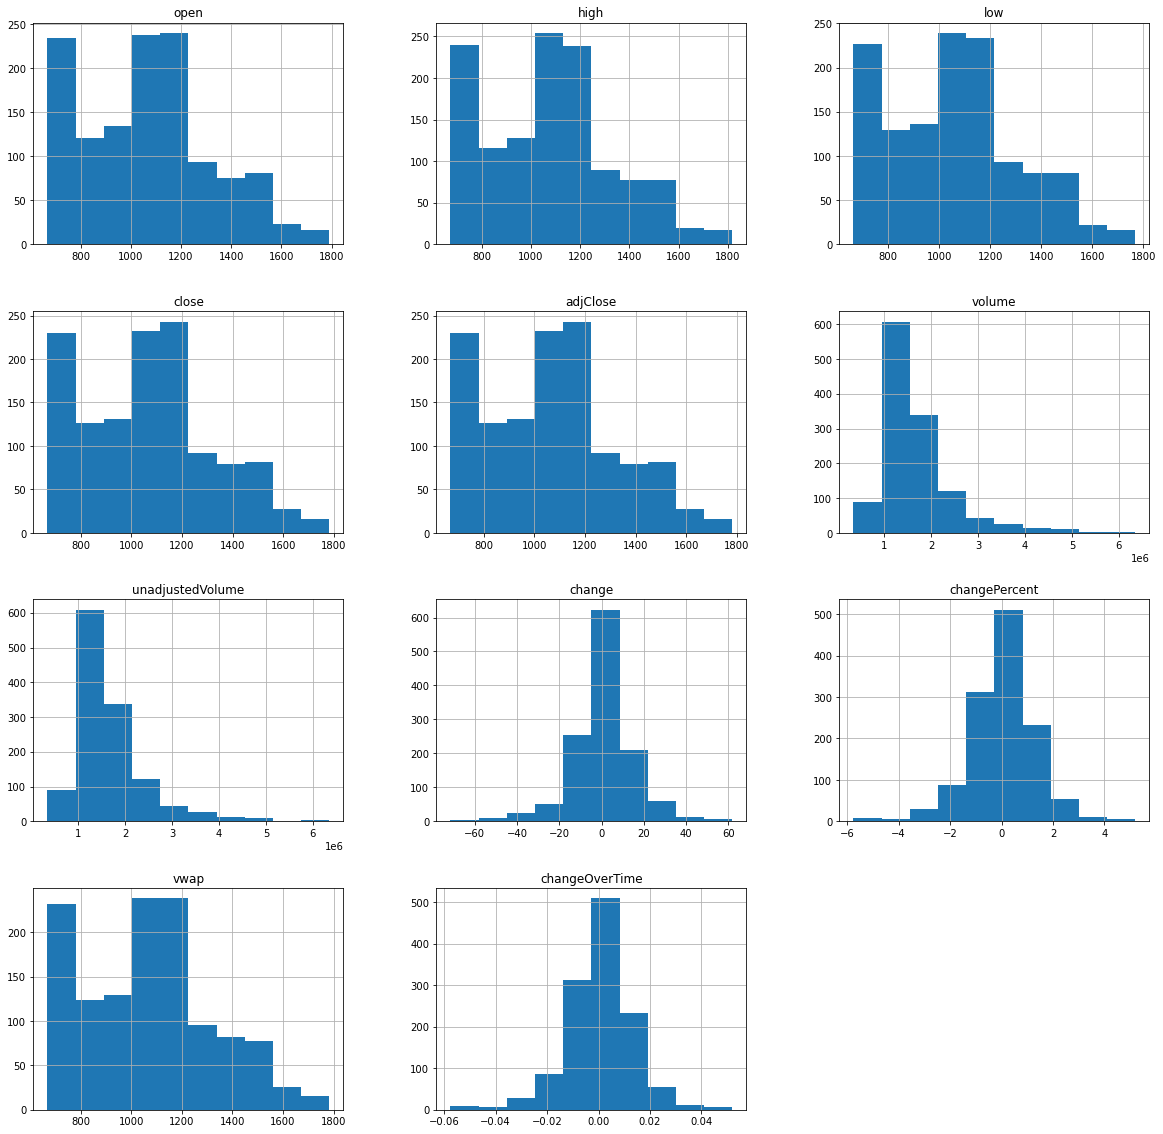

Looking for outliers


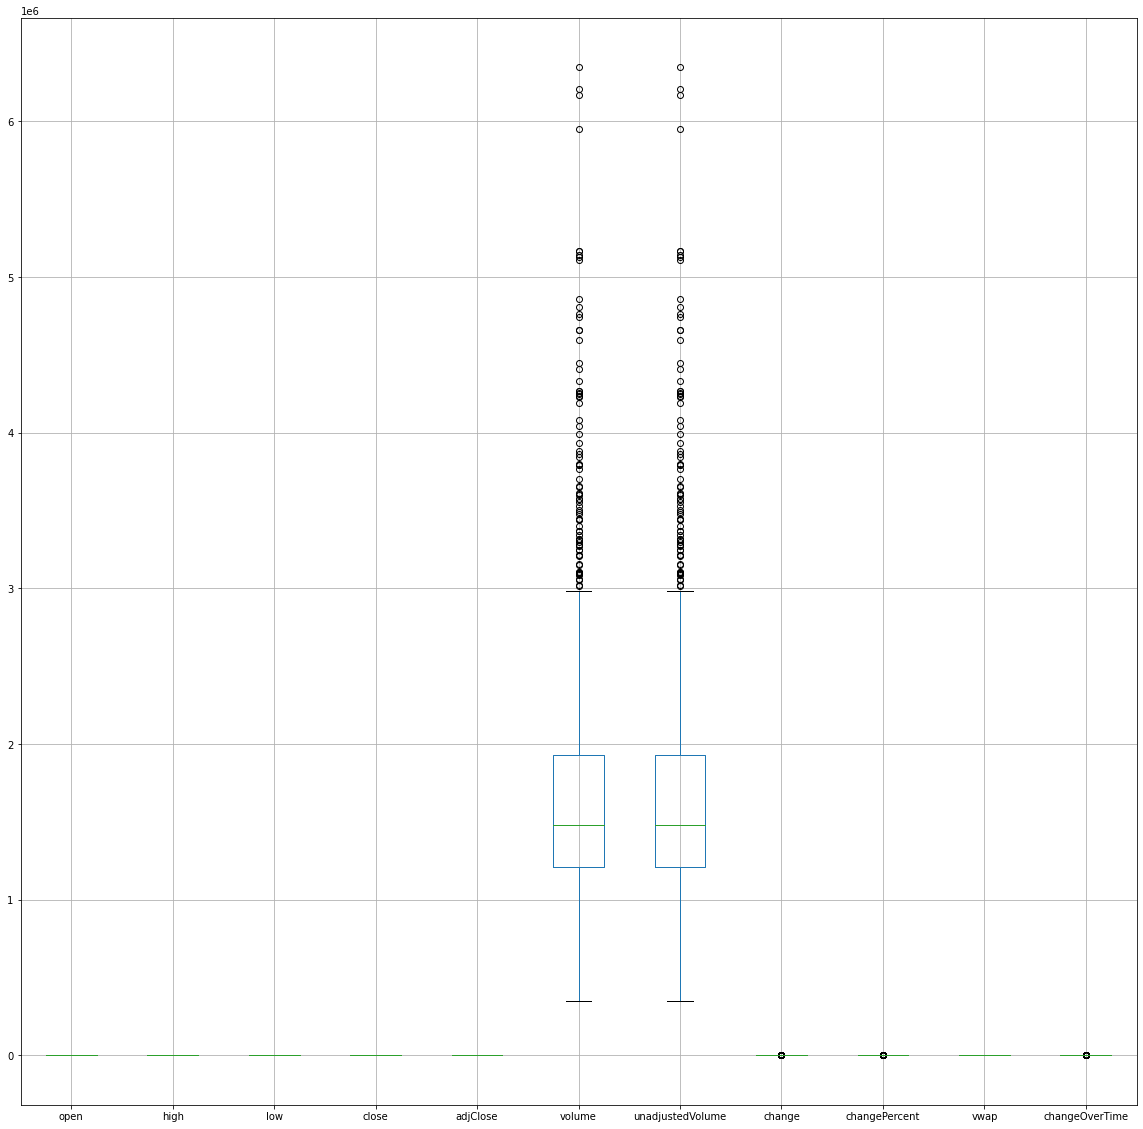

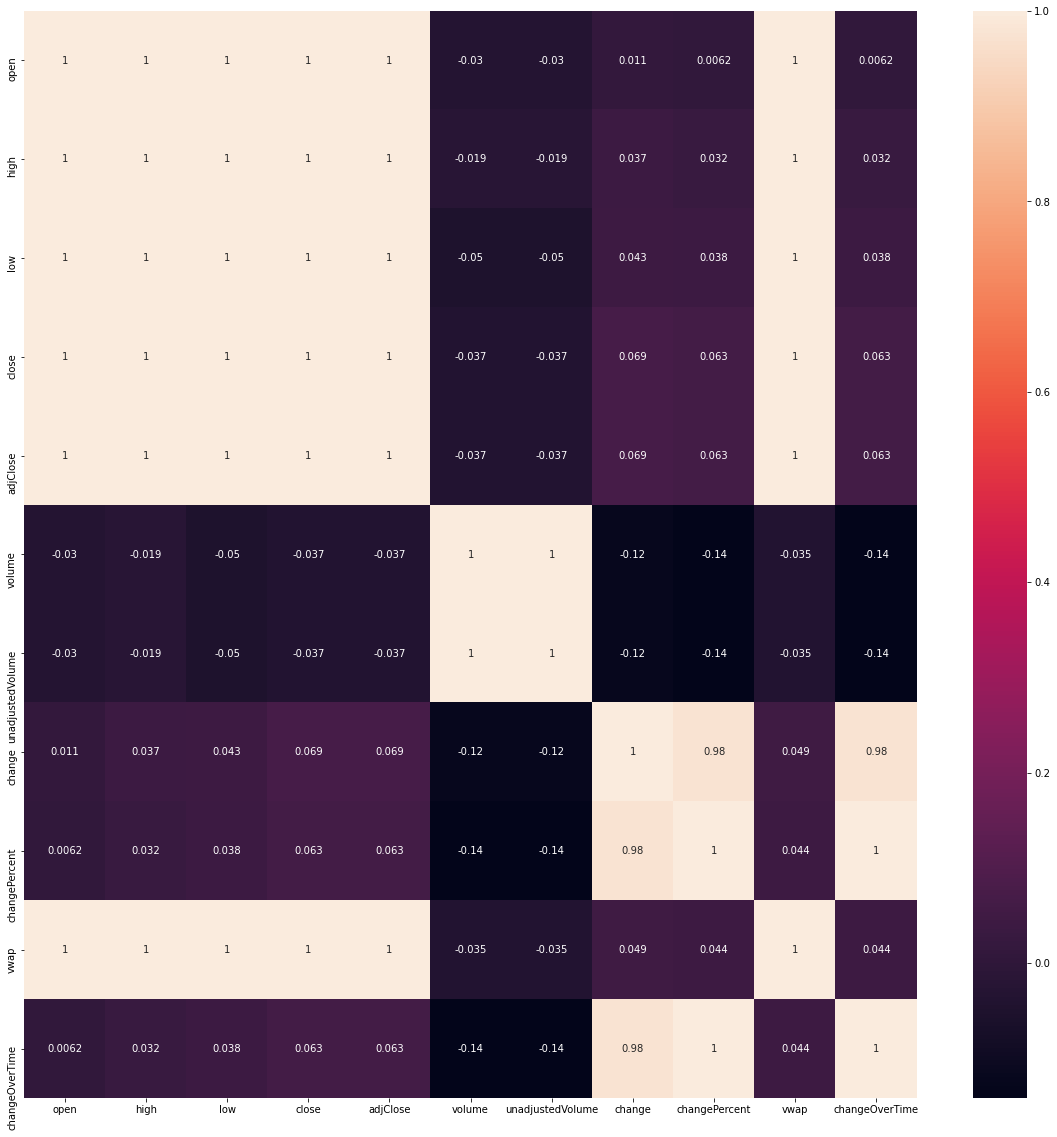

In [6]:
FM.visualize(df)

In [7]:
#FM.visualize(df)
FM.dataframeToLibsvm(df,'GOOG') # this generate a libsvm file (smvlight.dat)

# Classification

In [4]:
from pyspark.sql import SparkSession
import numpy as np
import matplotlib.pyplot as plt
import collections

## Get Company Data

Using method `getCompany` from API to get the folowing companies: Google, Aaple, Microsoft, Intel and Amazon.

In [5]:
for i in ['GOOG','AAPL','MSFT','INTC','AMZN']:
    df = FM.getCompany(i)
    FM.dataframeToLibsvm(df,i) 

## Spark Session

In [6]:
spark_session = SparkSession\
        .builder\
        .appName("Spark Regression")\
        .getOrCreate()

## Read the data in libsvm format

We read the data obtained after obtaining them with `getCompany` and save in a list.

In [7]:
df_companies = []
for i in ['GOOG','AAPL','MSFT','INTC','AMZN']:
    data = spark_session.read.format("libsvm").load("svmlight_"+i+".txt")
    df_companies.append([i,data])
    #print(data['features'])
df_companies

[['GOOG', DataFrame[label: double, features: vector]],
 ['AAPL', DataFrame[label: double, features: vector]],
 ['MSFT', DataFrame[label: double, features: vector]],
 ['INTC', DataFrame[label: double, features: vector]],
 ['AMZN', DataFrame[label: double, features: vector]]]

In [8]:
for i in df_companies:
    print(i[0])
    print(i[1].show())
    print("\n")

GOOG
+-----------+--------------------+
|      label|            features|
+-----------+--------------------+
|    1771.43|(10,[0,1,2,3,4,5,...|
|1768.880005|(10,[0,1,2,3,4,5,...|
|1734.859985|(10,[0,1,2,3,4,5,...|
|1742.189941|(10,[0,1,2,3,4,5,...|
|1763.920044|(10,[0,1,2,3,4,5,...|
|1746.780029|(10,[0,1,2,3,4,5,...|
|1770.150024|(10,[0,1,2,3,4,5,...|
|1781.380005|(10,[0,1,2,3,4,5,...|
| 1777.02002|(10,[0,1,2,3,4,5,...|
|1749.839966|(10,[0,1,2,3,4,5,...|
|1752.709961|(10,[0,1,2,3,4,5,...|
|1740.390015|(10,[0,1,2,3,4,5,...|
|     1763.0|(10,[0,1,2,3,4,5,...|
|    1761.75|(10,[0,1,2,3,4,5,...|
|1763.369995|(10,[0,1,2,3,4,5,...|
|1749.130005|(10,[0,1,2,3,4,5,...|
|1650.209961|(10,[0,1,2,3,4,5,...|
|1626.030029|(10,[0,1,2,3,4,5,...|
| 1621.01001|(10,[0,1,2,3,4,5,...|
| 1567.23999|(10,[0,1,2,3,4,5,...|
+-----------+--------------------+
only showing top 20 rows

None


AAPL
+----------+--------------------+
|     label|            features|
+----------+--------------------+
|116.029999|(10

## Linear Regression

Get the best model for each company. We use the method `LinearRegressionCli` from the API. this method get the best model using cross validation with param grid, root-mean-squared-error and predictions from the company data. We repeat the proccess 25 times to do a statical analysis later.

In [14]:
rms_dict_lr = {}
best_models_dict = {}
n = 25

companyResults = {}

for data in df_companies:
    print(data[0]+", Traninig...")
    rms_company = []
    best_model = []
    for i in range(n):
        print("Iteration:",i)

        # format: company, model, rmse, predictions
        model = FM.LinearRegressionCli(data[1],data[0])
        best_model.append(model)
        rms_company.append(model['rmse'])

    rms_dict_lr[data[0]] = rms_company
    best_models_dict[data[0]] = best_model
    
    print("Finish\n")    

GOOG, Traninig...
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Finish

AAPL, Traninig...
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Finish

MSFT, Traninig...
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteratio

### Print the coefficients and intercept for linear regression

Show the linear coefficients.

In [15]:
for i in best_models_dict:
    print("Company:",i)
    for j in best_models_dict[i]:
        print("Coefficients: %s" % str(j['model'].coefficients))
        print("Intercept: %s" % str(j['model'].intercept))
        print("\n")

Company: GOOG
Coefficients: [0.3565461200922357,0.39803009788806387,0.0,0.0,0.10994327447999276,0.13229127900748144,0.20015888677755792,0.0,0.0,0.19939745137787443]
Intercept: 2.0508888486434946


Coefficients: [0.21824820543091603,0.45323120068646067,0.0,0.0,0.18441517164549978,0.189383116672395,0.2096142953885906,0.0,0.0,0.19774808967978694]
Intercept: 0.7507300330468984


Coefficients: [0.21126262884556427,0.4485622308484666,0.0,0.0,0.190896820115899,0.195625283163027,0.20187368845051504,0.0,0.0,0.1992854224324364]
Intercept: 1.2348659331804681


Coefficients: [0.20820756158299877,0.4632828119962218,0.0,0.0,0.19066879906465725,0.1959036460822425,0.20523029592661038,0.0,0.0,0.19896955506481617]
Intercept: 1.16590976259319


Coefficients: [0.22508369692886868,0.42411219552566726,0.0024810375128971993,2.4810375128682493e-05,0.18007842453860148,0.19115228094303774,0.20252511370102985,0.0,0.0,0.19964899107394424]
Intercept: 1.7698828117257928


Coefficients: [0.20932900389588108,0.436166

### RMSE Mean

Show the error for each company.

In [27]:
for i in rms_dict_lr:
    print("Company:",i)
    print("Mean - RMSE: %f" % np.mean(rms_dict_lr[i]))
    print("\n\n")
    

Company: GOOG
Mean - RMSE: 1.944302



Company: AAPL
Mean - RMSE: 0.148718



Company: MSFT
Mean - RMSE: 0.232764



Company: INTC
Mean - RMSE: 0.095673



Company: AMZN
Mean - RMSE: 3.308707





### Summarize the model over the training set and print out some metrics

Show model summarize for each company.

In [17]:
for i in best_models_dict:
    print("Company:",i)
    
    for j in best_models_dict[i]:
        trainingSummary = j['model'].summary
        
        print("numIterations: %d" % trainingSummary.totalIterations)
        print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
        trainingSummary.residuals.show()
        print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
        print("r2: %f" % trainingSummary.r2)

        print("\n\n")

Company: G
numIterations: 51
objectiveHistory: [0.5, 0.3946253761862716, 0.0012897339479016673, 0.0012498981960211543, 0.0012328754915954907, 0.0012327559224621857, 0.0012316304204885262, 0.0012313087825471258, 0.0012306550524711145, 0.0012304069981625958, 0.0012303582087351103, 0.0012301390245899892, 0.0012300895489237688, 0.0012298906997272926, 0.0012298412112714343, 0.001229661951177546, 0.0012296270778560329, 0.0012294275519335288, 0.0012293843547372927, 0.0012292152564499083, 0.0012291509278195137, 0.0012290011074990769, 0.0012289176163744221, 0.0012287793765095487, 0.0012286698721293175, 0.0012285319335805052, 0.0012283831023169461, 0.0012282318337418193, 0.0012280194017822122, 0.0012278393533694306, 0.0012276901327103787, 0.0012268863930072896, 0.0012264095645669643, 0.0012263610692642493, 0.0012262716207925447, 0.0012260998159077333, 0.0012260624443875667, 0.0012259532671870976, 0.0012258667360803021, 0.0012246266025173404, 0.0012198569309715935, 0.0012191941427535172, 0.001219

### Predictions

Show the predictins for each company.

In [18]:
for i in best_models_dict:
    print(i,"\n")
    for j in best_models_dict[i]:
        print(j['predictions'].select("prediction", "label", "features").show(10))
    
    print("\n\n")

GOOG 

+-----------------+------+--------------------+
|       prediction| label|            features|
+-----------------+------+--------------------+
|678.3075809964761|675.22|(10,[0,1,2,3,4,5,...|
| 682.166437016898|678.11|(10,[0,1,2,3,4,5,...|
|683.0077648264546| 682.4|(10,[0,1,2,3,4,5,...|
|682.9178306503954|682.74|(10,[0,1,2,3,4,5,...|
|683.3898594213667|683.57|(10,[0,1,2,3,4,5,...|
|693.2622730635289|692.36|(10,[0,1,2,3,4,5,...|
|695.0935088710958|693.71|(10,[0,1,2,3,4,5,...|
|695.9484362028517|693.97|(10,[0,1,2,3,4,5,...|
|694.3712502575019|695.16|(10,[0,1,2,3,4,5,...|
|698.2101752088198|698.21|(10,[0,1,2,3,4,5,...|
+-----------------+------+--------------------+
only showing top 10 rows

None
+-----------------+------+--------------------+
|       prediction| label|            features|
+-----------------+------+--------------------+
|678.6815916408125|675.22|(10,[0,1,2,3,4,5,...|
|678.9247041291803|680.04|(10,[0,1,2,3,4,5,...|
|682.7036431019307| 682.4|(10,[0,1,2,3,4,5,...|
|6

## Gradient Boosting Regressor

Get the best model for each company. We use the method `GradienBoostingRegressorCli` from the API. this method get the best model using cross validation with param grid, root-mean-squared-error and predictions from the company data. We repeat the proccess 25 times to do a statical analysis later.

In [19]:
rms_dict_gbr = {}
best_models_dict = {}


for data in df_companies:
    print(data[0]+", Traninig...")
    rms_company = []
    best_model = []
    for i in range(n):
        print("Iteration:",i)

        # format: company, model, rmse, predictions
        model = FM.GradienBoostingRegressorCli(data[1],data[0])
        best_model.append(model)
        rms_company.append(model['rmse'])

    rms_dict_gbr[data[0]] = rms_company
    best_models_dict[data[0]] = best_model
    
    print("Finish")

GOOG, Traninig...
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Finish
AAPL, Traninig...
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Finish
MSFT, Traninig...
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration:

### Print out metrics for each company

In [26]:
for i in rms_dict_gbr:
    print("Company:",i)
    print("Mean - RMSE: %f" % np.mean(rms_dict_gbr[i]))
    print("\n\n")

Company: GOOG
Mean - RMSE: 20.194274



Company: AAPL
Mean - RMSE: 1.870712



Company: MSFT
Mean - RMSE: 2.508766



Company: INTC
Mean - RMSE: 0.694952



Company: AMZN
Mean - RMSE: 56.083177





### Predictions

In [21]:
for i in best_models_dict:
    print(i,"\n")
    for j in best_models_dict[i]:
        print(j['predictions'].select("prediction", "label", "features").show(10))
    
    print("\n\n")

GOOG 

+-----------------+------+--------------------+
|       prediction| label|            features|
+-----------------+------+--------------------+
|691.4914937990119|683.57|(10,[0,1,2,3,4,5,...|
|668.0212226738151|684.12|(10,[0,1,2,3,4,5,...|
|668.0803301443235| 691.0|(10,[0,1,2,3,4,5,...|
|691.4914937990119|691.02|(10,[0,1,2,3,4,5,...|
|695.2021552016768|692.36|(10,[0,1,2,3,4,5,...|
|699.1598222328281|694.95|(10,[0,1,2,3,4,5,...|
|701.2708481533047| 695.7|(10,[0,1,2,3,4,5,...|
|668.0803301443235|697.77|(10,[0,1,2,3,4,5,...|
| 683.096189900749|698.45|(10,[0,1,2,3,4,5,...|
|699.7614937990116|700.56|(10,[0,1,2,3,4,5,...|
+-----------------+------+--------------------+
only showing top 10 rows

None
+-----------------+------+--------------------+
|       prediction| label|            features|
+-----------------+------+--------------------+
|684.6397847685963|680.04|(10,[0,1,2,3,4,5,...|
|695.5811285397825| 682.4|(10,[0,1,2,3,4,5,...|
|698.5012148856206|683.11|(10,[0,1,2,3,4,5,...|
| 

## Isotonic Regressor

Get the best model for each company. We use the method `IsotonicRegressionCli` from the API. this method get the best model using cross validation with param grid, root-mean-squared-error and predictions from the company data. We repeat the proccess 25 times to do a statical analysis later.

In [22]:
rms_dict_ir = {}
best_models_dict = {}


for data in df_companies:
    print(data[0]+", Traninig...")
    rms_company = []
    best_model = []
    for i in range(n):
        print("Iteration:",i)

        # format: company, model, rmse, predictions
        model = FM.IsotonicRegressionCli(data[1],data[0])
        best_model.append(model)
        rms_company.append(model['rmse'])

    rms_dict_ir[data[0]] = rms_company
    best_models_dict[data[0]] = best_model
    
    print("Finish")
    

GOOG, Traninig...
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Finish
AAPL, Traninig...
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Finish
MSFT, Traninig...
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration:

### Print out metrics

In [25]:
for i in rms_dict_ir:
    print("Company:",i)
    print("Mean - RMSE: %f" % np.mean(rms_dict_ir[i]))
    print("\n\n")

Company: GOOG
Mean - RMSE: 0.192991



Company: AAPL
Mean - RMSE: 0.288191



Company: MSFT
Mean - RMSE: 0.116404



Company: INTC
Mean - RMSE: 0.041826



Company: AMZN
Mean - RMSE: 0.830054





### Predictions

In [24]:
for i in best_models_dict:
    print(i,"\n")
    for j in best_models_dict[i]:
        print(j['predictions'].select("prediction", "label", "features").show(10))
    
    print("\n\n")


GOOG 

+----------+------+--------------------+
|prediction| label|            features|
+----------+------+--------------------+
|    680.04|668.26|(10,[0,1,2,3,4,5,...|
|    680.04|675.22|(10,[0,1,2,3,4,5,...|
|    680.04|678.11|(10,[0,1,2,3,4,5,...|
|    682.74|682.74|(10,[0,1,2,3,4,5,...|
|    693.01|693.01|(10,[0,1,2,3,4,5,...|
|    693.71|693.71|(10,[0,1,2,3,4,5,...|
|    693.97|693.97|(10,[0,1,2,3,4,5,...|
|    694.95|694.95|(10,[0,1,2,3,4,5,...|
|     695.7| 695.7|(10,[0,1,2,3,4,5,...|
|    695.85|695.85|(10,[0,1,2,3,4,5,...|
+----------+------+--------------------+
only showing top 10 rows

None
+----------+------+--------------------+
|prediction| label|            features|
+----------+------+--------------------+
|    675.22|668.26|(10,[0,1,2,3,4,5,...|
|    680.04|680.04|(10,[0,1,2,3,4,5,...|
|     682.4| 682.4|(10,[0,1,2,3,4,5,...|
|    683.57|683.57|(10,[0,1,2,3,4,5,...|
|    695.16|695.16|(10,[0,1,2,3,4,5,...|
|    695.85|695.85|(10,[0,1,2,3,4,5,...|
|    695.94|695.94|

In [25]:
for i in best_models_dict:
    print(i,"\n")
    for j in best_models_dict[i]:
        rfResult = j['predictions'].toPandas()
        print( collections.Counter(rfResult.prediction==rfResult.label), len(rfResult.label) )
    print("\n\n")

GOOG 

Counter({True: 383}) 383
Counter({True: 363}) 363
Counter({True: 373, False: 2}) 375
Counter({True: 394}) 394
Counter({True: 339, False: 1}) 340
Counter({True: 401, False: 2}) 403
Counter({True: 354, False: 1}) 355
Counter({True: 411}) 411
Counter({True: 374, False: 1}) 375
Counter({True: 381}) 381
Counter({True: 355}) 355
Counter({True: 389, False: 1}) 390
Counter({True: 401, False: 1}) 402
Counter({True: 375, False: 4}) 379
Counter({True: 374}) 374
Counter({True: 380}) 380
Counter({True: 356}) 356
Counter({True: 366}) 366
Counter({True: 371, False: 2}) 373
Counter({True: 410}) 410
Counter({True: 394}) 394
Counter({True: 364}) 364
Counter({True: 388, False: 2}) 390
Counter({True: 387, False: 2}) 389
Counter({True: 361, False: 1}) 362



AAPL 

Counter({False: 404}) 404
Counter({False: 383, True: 4}) 387
Counter({False: 385, True: 4}) 389
Counter({False: 376, True: 2}) 378
Counter({False: 371, True: 4}) 375
Counter({False: 385, True: 1}) 386
Counter({False: 355, True: 3}) 358
Co

## Stadistical Analysis

To start with this section, it is necessary to pre-process the data by transforming it into the desired format.

In [56]:
company = ['GOOG','AAPL','MSFT','INTC','AMZN']
resultsCompany = dict()
for i in range(len(rms_dict_lr)):
    resultsCompany[company[i]] ={'lr_rmse': rms_dict_lr[company[i]] ,'gbr_rmse': rms_dict_gbr[company[i]], 'ir_rmse' :rms_dict_ir[company[i]]}


The steps I will take will be to study the distribution of the data through boxplots, study the normality of the data and finally apply a parametric or non-parametric test, depending on the result expected in the previous step.

In [79]:
goog = resultsCompany['GOOG']
aapl = resultsCompany['AAPL']
msft = resultsCompany['MSFT']
intc = resultsCompany['INTC']
amzn = resultsCompany['AMZN']

Text(0, 0.5, 'Error value')

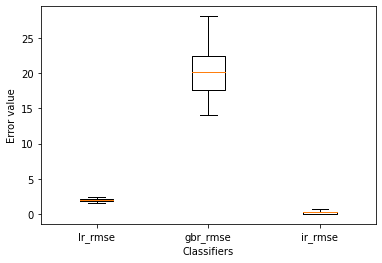

In [75]:
lr = goog['lr_rmse']
gbr = goog['gbr_rmse']
ir = goog['ir_rmse']
data = [lr,gbr,ir]
plt.boxplot(data)
plt.xticks([1, 2, 3], ['lr_rmse', 'gbr_rmse', 'ir_rmse'])
plt.xlabel("Classifiers")
plt.ylabel("Error value")

Text(0, 0.5, 'Error value')

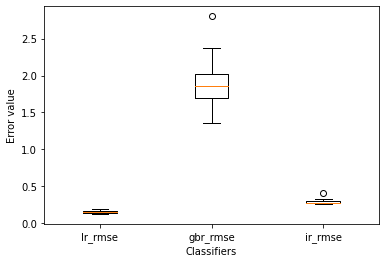

In [76]:
lr = aapl['lr_rmse']
gbr = aapl['gbr_rmse']
ir = aapl['ir_rmse']
data = [lr,gbr,ir]
plt.boxplot(data)
plt.xticks([1, 2, 3], ['lr_rmse', 'gbr_rmse', 'ir_rmse'])
plt.xlabel("Classifiers")
plt.ylabel("Error value")

Text(0, 0.5, 'Error value')

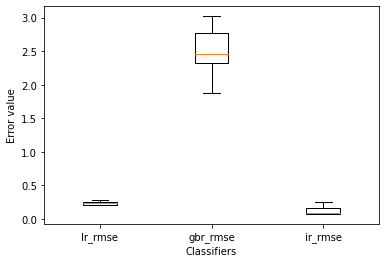

In [77]:
lr = msft['lr_rmse']
gbr = msft['gbr_rmse']
ir = msft['ir_rmse']
data = [lr,gbr,ir]
plt.boxplot(data)
plt.xticks([1, 2, 3], ['lr_rmse', 'gbr_rmse', 'ir_rmse'])
plt.xlabel("Classifiers")
plt.ylabel("Error value")

Text(0, 0.5, 'Error value')

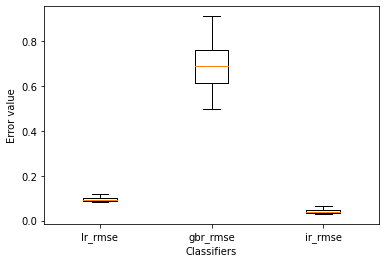

In [78]:
lr = intc['lr_rmse']
gbr = intc['gbr_rmse']
ir = intc['ir_rmse']
data = [lr,gbr,ir]
plt.boxplot(data)
plt.xticks([1, 2, 3], ['lr_rmse', 'gbr_rmse', 'ir_rmse'])
plt.xlabel("Classifiers")
plt.ylabel("Error value")

Text(0, 0.5, 'Error value')

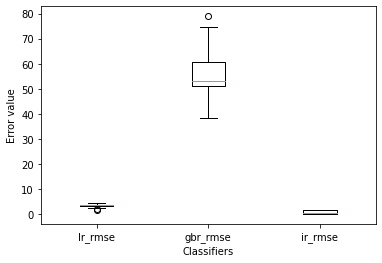

In [80]:
lr = amzn['lr_rmse']
gbr = amzn['gbr_rmse']
ir = amzn['ir_rmse']
data = [lr,gbr,ir]
plt.boxplot(data)
plt.xticks([1, 2, 3], ['lr_rmse', 'gbr_rmse', 'ir_rmse'])
plt.xlabel("Classifiers")
plt.ylabel("Error value")

To be able to interpret the results it is necessary to know what a boxplot represents and what values are being used. First, a boxplot represents the values of the first quartile, second quartile or median, third quartile and the interquartile range. In addition, it allows us to detect possible outliers. Second, the data to be represented corresponds to the root of the mean square error (RMSE), so a lower value means a better result. 

In most cases, the worst result is obtained with the Gradient Boosting Regressor classifier, followed by Linear Regression and Isotonic Regressor. 

The next step in this section will be to obtain if all the values follow a normal distribution in order to work with the mean and with parametric tests. Otherwise I will work with non-parametric tests and with the median.

In [132]:
classifier_eval = [goog['lr_rmse'], goog['gbr_rmse'], goog['ir_rmse'],
                   aapl['lr_rmse'], aapl['gbr_rmse'], aapl['ir_rmse'],
                   msft['lr_rmse'], msft['gbr_rmse'], msft['ir_rmse'],
                   intc['lr_rmse'], intc['gbr_rmse'], intc['ir_rmse'],
                   amzn['lr_rmse'], amzn['gbr_rmse'], amzn['ir_rmse'] 
                  ]
                   
values = ['GOOGLE-LR', 'GOOGLE-GBR', 'GOOGLE-IR', 'APPLE-LR', 'APPLE-GBR', 'APPLE-IR', 'MICROSOFT-LR', 'MICROSOFT-GBR', 'MICROSOFT-IR', 'INTEL-LR', 'INTEL-GBR', 'INTEL-IR', 'AMAZON-LR', 'AMAZON-GBR', 'AMAZON-IR']

for i in range(len(classifier_eval)):
        print(values[i])
        s , p = stats.normaltest( classifier_eval[i])
        print(stats.normaltest( classifier_eval[i]))
        if p < 0.05:
            print('Not normal distribution\n')
        else:
             print('Normal distribution\n')

GOOGLE-LR
NormaltestResult(statistic=0.6319703963181401, pvalue=0.7290702416695005)
Normal distribution

GOOGLE-GBR
NormaltestResult(statistic=0.8403889594400749, pvalue=0.6569190499582134)
Normal distribution

GOOGLE-IR
NormaltestResult(statistic=4.374458360871557, pvalue=0.1122272797481544)
Normal distribution

APPLE-LR
NormaltestResult(statistic=0.7222831662222866, pvalue=0.6968803249972815)
Normal distribution

APPLE-GBR
NormaltestResult(statistic=9.367858012740802, pvalue=0.009242628109175513)
Not normal distribution

APPLE-IR
NormaltestResult(statistic=37.508426655584785, pvalue=7.163885555695712e-09)
Not normal distribution

MICROSOFT-LR
NormaltestResult(statistic=1.9005258232831477, pvalue=0.38663935810224886)
Normal distribution

MICROSOFT-GBR
NormaltestResult(statistic=0.015748372113147432, pvalue=0.9921567341361105)
Normal distribution

MICROSOFT-IR
NormaltestResult(statistic=7.678986068831173, pvalue=0.021504500623803147)
Not normal distribution

INTEL-LR
NormaltestResult(s

Since all the attributes do not follow a normal distribution, I have represented the following table with the median of the values obtained for each classifier by company.

In [133]:
col_names =  ['Linear Regression', 'Gradient Boosting Regressor', 'Isotonic Regressor']

df = pd.DataFrame(columns = col_names, index=company)
df.iloc[0] = [np.median(goog['lr_rmse']), np.median(goog['gbr_rmse']), np.median(goog['ir_rmse']) ]
df.iloc[1] = [np.median(aapl['lr_rmse']), np.median(aapl['gbr_rmse']), np.median(aapl['ir_rmse']) ]
df.iloc[2] = [np.median(msft['lr_rmse']), np.median(msft['gbr_rmse']), np.median(msft['ir_rmse']) ]
df.iloc[3] = [np.median(intc['lr_rmse']), np.median(intc['gbr_rmse']), np.median(intc['ir_rmse']) ]
df.iloc[4] = [np.median(amzn['lr_rmse']), np.median(amzn['gbr_rmse']), np.median(amzn['ir_rmse']) ]
print(df)

     Linear Regression Gradient Boosting Regressor Isotonic Regressor
GOOG           1.95176                     20.1434           0.223076
AAPL          0.150483                     1.85624           0.277102
MSFT          0.228722                     2.45889          0.0875762
INTC          0.093728                    0.690332          0.0389051
AMZN           3.44582                     52.9342           0.319589


Finally, I have applied the Wilcoxon Test to evaluate which grader is better than another with a higher security, since there is so much difference between the Gradient Boosting Regressor error and the others, it is not clear which one is the best in each case. 

In [137]:
for i in range(0,3):
    for j in range(i+1, 3):
        print(values[i], values[j])
        s , p = stats.ranksums( classifier_eval[i], classifier_eval[j])
        print(stats.ranksums( classifier_eval[i], classifier_eval[j]))
        if p > 0.05:
            print('The difference is not significant.\n')
        else:
            print('Algorithm ',values[i] , 'has a worse performance than algorithm ', values[j],  'with 95% certainty.\n')

GOOGLE-LR GOOGLE-GBR
RanksumsResult(statistic=-6.063390625908324, pvalue=1.332814294054072e-09)
Algorithm  GOOGLE-LR has a worse performance than algorithm  GOOGLE-GBR with 95% certainty.

GOOGLE-LR GOOGLE-IR
RanksumsResult(statistic=6.063390625908324, pvalue=1.332814294054072e-09)
Algorithm  GOOGLE-LR has a worse performance than algorithm  GOOGLE-IR with 95% certainty.

GOOGLE-GBR GOOGLE-IR
RanksumsResult(statistic=6.063390625908324, pvalue=1.332814294054072e-09)
Algorithm  GOOGLE-GBR has a worse performance than algorithm  GOOGLE-IR with 95% certainty.



In [138]:
for i in range(3,6):
    for j in range(i+1, 6):
        print(values[i], values[j])
        s , p = stats.ranksums( classifier_eval[i], classifier_eval[j])
        print(stats.ranksums( classifier_eval[i], classifier_eval[j]))
        if p > 0.05:
            print('The difference is not significant.\n')
        else:
            print('Algorithm ',values[i] , 'has a worse performance than algorithm ', values[j],  'with 95% certainty.\n')

APPLE-LR APPLE-GBR
RanksumsResult(statistic=-6.063390625908324, pvalue=1.332814294054072e-09)
Algorithm  APPLE-LR has a worse performance than algorithm  APPLE-GBR with 95% certainty.

APPLE-LR APPLE-IR
RanksumsResult(statistic=-6.063390625908324, pvalue=1.332814294054072e-09)
Algorithm  APPLE-LR has a worse performance than algorithm  APPLE-IR with 95% certainty.

APPLE-GBR APPLE-IR
RanksumsResult(statistic=6.063390625908324, pvalue=1.332814294054072e-09)
Algorithm  APPLE-GBR has a worse performance than algorithm  APPLE-IR with 95% certainty.



In [139]:
for i in range(6,9):
    for j in range(i+1, 9):
        print(values[i], values[j])
        s , p = stats.ranksums( classifier_eval[i], classifier_eval[j])
        print(stats.ranksums( classifier_eval[i], classifier_eval[j]))
        if p > 0.05:
            print('The difference is not significant.\n')
        else:
            print('Algorithm ',values[i] , 'has a worse performance than algorithm ', values[j],  'with 95% certainty.\n')

MICROSOFT-LR MICROSOFT-GBR
RanksumsResult(statistic=-6.063390625908324, pvalue=1.332814294054072e-09)
Algorithm  MICROSOFT-LR has a worse performance than algorithm  MICROSOFT-GBR with 95% certainty.

MICROSOFT-LR MICROSOFT-IR
RanksumsResult(statistic=5.423096575812405, pvalue=5.857532411971916e-08)
Algorithm  MICROSOFT-LR has a worse performance than algorithm  MICROSOFT-IR with 95% certainty.

MICROSOFT-GBR MICROSOFT-IR
RanksumsResult(statistic=6.063390625908324, pvalue=1.332814294054072e-09)
Algorithm  MICROSOFT-GBR has a worse performance than algorithm  MICROSOFT-IR with 95% certainty.



In [140]:
for i in range(9,12):
    for j in range(i+1, 12):
        print(values[i], values[j])
        s , p = stats.ranksums( classifier_eval[i], classifier_eval[j])
        print(stats.ranksums( classifier_eval[i], classifier_eval[j]))
        if p > 0.05:
            print('The difference is not significant.\n')
        else:
            print('Algorithm ',values[i] , 'has a worse performance than algorithm ', values[j],  'with 95% certainty.\n')

INTEL-LR INTEL-GBR
RanksumsResult(statistic=-6.063390625908324, pvalue=1.332814294054072e-09)
Algorithm  INTEL-LR has a worse performance than algorithm  INTEL-GBR with 95% certainty.

INTEL-LR INTEL-IR
RanksumsResult(statistic=6.063390625908324, pvalue=1.332814294054072e-09)
Algorithm  INTEL-LR has a worse performance than algorithm  INTEL-IR with 95% certainty.

INTEL-GBR INTEL-IR
RanksumsResult(statistic=6.063390625908324, pvalue=1.332814294054072e-09)
Algorithm  INTEL-GBR has a worse performance than algorithm  INTEL-IR with 95% certainty.



In [141]:
for i in range(12,15):
    for j in range(i+1, 15):
        print(values[i], values[j])
        s , p = stats.ranksums( classifier_eval[i], classifier_eval[j])
        print(stats.ranksums( classifier_eval[i], classifier_eval[j]))
        if p > 0.05:
            print('The difference is not significant.\n')
        else:
            print('Algorithm ',values[i] , 'has a worse performance than algorithm ', values[j],  'with 95% certainty.\n')

AMAZON-LR AMAZON-GBR
RanksumsResult(statistic=-6.063390625908324, pvalue=1.332814294054072e-09)
Algorithm  AMAZON-LR has a worse performance than algorithm  AMAZON-GBR with 95% certainty.

AMAZON-LR AMAZON-IR
RanksumsResult(statistic=5.830556425873445, pvalue=5.524285425707624e-09)
Algorithm  AMAZON-LR has a worse performance than algorithm  AMAZON-IR with 95% certainty.

AMAZON-GBR AMAZON-IR
RanksumsResult(statistic=6.063390625908324, pvalue=1.332814294054072e-09)
Algorithm  AMAZON-GBR has a worse performance than algorithm  AMAZON-IR with 95% certainty.

